In [1]:
import pandas as pd
df = pd.read_csv("your.csv")
df.head(10)

,body1
0,I just discovered this sub so I feel like an o...
1,I have spent most of my life suffering from on...
2,*My teeth hurt:* You probably have a sinus inf...
3,*My sinuses hurt:* It's the weather; You have ...
4,*My throat hurts:* You shouldn't smoke; It's t...
5,*My eyes are full of gunk:* That's normal; Cle...
6,*I'm so tired:* It's winter; Everyone's Vitami...
7,*I can't breathe:* You're overweight; You have...
8,*I can't do that much in one day:* You're lazy...
9,Maybe you have a magnesium deficiency? Maybe y...


In [2]:
import gensim
def read_questions(row,column_name):
    return gensim.utils.simple_preprocess(str(row[column_name]).encode('utf-8'))
    
documents = []
for index, row in df.iterrows():
    documents.append(read_questions(row,"body1"))

In [3]:
print("List of lists. Let's confirm: ", type(documents), " of ", type(documents[0]))

List of lists. Let's confirm:  <class 'list'>  of  <class 'list'>


In [4]:
model = gensim.models.Word2Vec(size=8000, window=10, min_count=2, sg=1, workers=10)
model.build_vocab(documents)

In [5]:
model.train(sentences=documents, total_examples=len(documents), epochs=model.iter)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """Entry point for launching an IPython kernel.


(1507800, 1977255)

In [6]:
word_vectors = model.wv
count = 0
for word in word_vectors.vocab:
    if count<10:
        print(word)
        count += 1
    else:
        break

sparingly
corticosteroids
theres
splits
follows
awfully
allergy
rheumatologists
hypermobility
that


In [7]:
len(word_vectors.vocab)

8417

In [8]:
vector = model.wv["biomarkers"]  # numpy vector of a word
len(vector)

8000

In [9]:
vector

array([ 0.02671718, -0.00705581, -0.00468634, ..., -0.02834113,
       -0.04415043, -0.03491354], dtype=float32)

In [10]:
wanted_words = []
count = 0
for word in word_vectors.vocab:
    if count<150:
        wanted_words.append(word)
        count += 1
    else:
        break
wanted_vocab = dict((k, word_vectors.vocab[k]) for k in wanted_words if k in word_vectors.vocab)
wanted_vocab

{'absolutely': <gensim.models.keyedvectors.Vocab at 0x7f1226cd1470>,
 'acids': <gensim.models.keyedvectors.Vocab at 0x7f1225575048>,
 'allergy': <gensim.models.keyedvectors.Vocab at 0x7f1225573fd0>,
 'annoyed': <gensim.models.keyedvectors.Vocab at 0x7f1226cd17f0>,
 'any': <gensim.models.keyedvectors.Vocab at 0x7f122552c400>,
 'asleep': <gensim.models.keyedvectors.Vocab at 0x7f122555bc18>,
 'atleast': <gensim.models.keyedvectors.Vocab at 0x7f12255755c0>,
 'autoimmunerebel': <gensim.models.keyedvectors.Vocab at 0x7f1226cd17b8>,
 'awfully': <gensim.models.keyedvectors.Vocab at 0x7f1230c29860>,
 'backside': <gensim.models.keyedvectors.Vocab at 0x7f1230c29a58>,
 'battled': <gensim.models.keyedvectors.Vocab at 0x7f1226cd1358>,
 'becoming': <gensim.models.keyedvectors.Vocab at 0x7f12255afc18>,
 'bell': <gensim.models.keyedvectors.Vocab at 0x7f12255afdd8>,
 'bengal': <gensim.models.keyedvectors.Vocab at 0x7f1226cd12e8>,
 'bill': <gensim.models.keyedvectors.Vocab at 0x7f1225575320>,
 'bills': <

In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
X = model[wanted_vocab] # X is an array of word vectors, each vector containing 150 tokens
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
Y = tsne_model.fit_transform(X)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


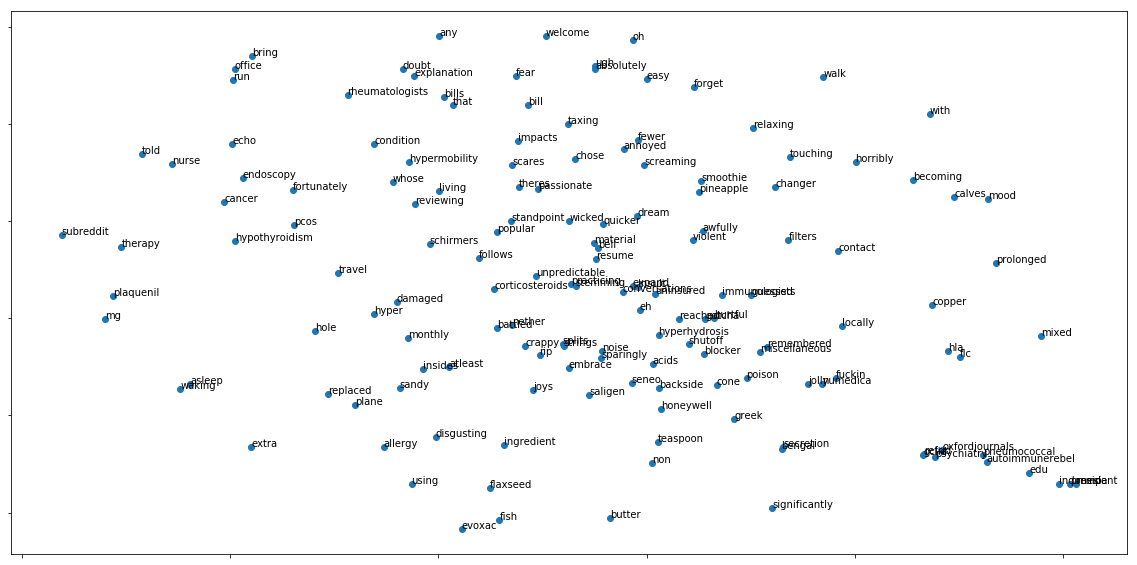

In [12]:
#Plot the t-SNE output
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(Y[:, 0], Y[:, 1])
words = list(wanted_vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks
_ = plt.show()


In [20]:
words = list(wanted_vocab)
len(words)

150

In [21]:
w1 = "sjogren"
x=model.wv.most_similar(positive=w1, topn=5)
x

[('sjögren', 0.9255070090293884),
 ('sjogrens', 0.8750261664390564),
 ('ss', 0.835112452507019),
 ('sjögrens', 0.8161634206771851),
 ('hashimoto', 0.8131330013275146)]

In [14]:
model.wv.doesnt_match(["sjogren","men","women"])

'sjogren'

In [15]:
w1 = ["women","men"]
w2 = ["sjogren"]
model.wv.most_similar (positive=w1,negative=w2,topn=2)

[('among', 0.8863091468811035), ('role', 0.8515195846557617)]

# Filtering(similarity>0.9):

In [23]:
if "sjogren" in model.wv:
    print("y")
else:
    print("n")

y


In [27]:
def distance(word):
    s=[('sjogren',1.0)]
    step1=[]
    w1 = word
    x=model.wv.most_similar(positive=w1,topn=10000)
    for i in x:
        d = list(i)
        s.append(d)
    for a,b in s:
        if b>0.75:
            step1.append((a,b))
    return step1
#or
#q=[item for item in model.wv.most_similar(positive="sjogren",topn=1000) if item[1]>0.9]
#q

In [28]:
y=distance("sjogren")
print(len(y))
y

75


[('sjogren', 1.0),
 ('sjögren', 0.9255070090293884),
 ('sjogrens', 0.8750261664390564),
 ('ss', 0.835112452507019),
 ('sjögrens', 0.8161634206771851),
 ('hashimoto', 0.8131330013275146),
 ('developing', 0.812669038772583),
 ('secondary', 0.8071603178977966),
 ('seronegative', 0.8043959140777588),
 ('stages', 0.7991374731063843),
 ('lupus', 0.7943911552429199),
 ('formal', 0.7916610836982727),
 ('sjorens', 0.7916255593299866),
 ('pss', 0.7899026870727539),
 ('overlap', 0.7890896797180176),
 ('genetic', 0.7863122224807739),
 ('idiopathic', 0.7858065366744995),
 ('diagnosing', 0.7851107716560364),
 ('men', 0.7828538417816162),
 ('connective', 0.7819162011146545),
 ('syndrome', 0.7815555930137634),
 ('eds', 0.7812550663948059),
 ('sle', 0.7807084321975708),
 ('understanding', 0.7799335718154907),
 ('potential', 0.7791182994842529),
 ('classic', 0.7777391076087952),
 ('crohns', 0.7765538096427917),
 ('occurs', 0.7750384211540222),
 ('report', 0.7737055420875549),
 ('hypothyroidism', 0.77347

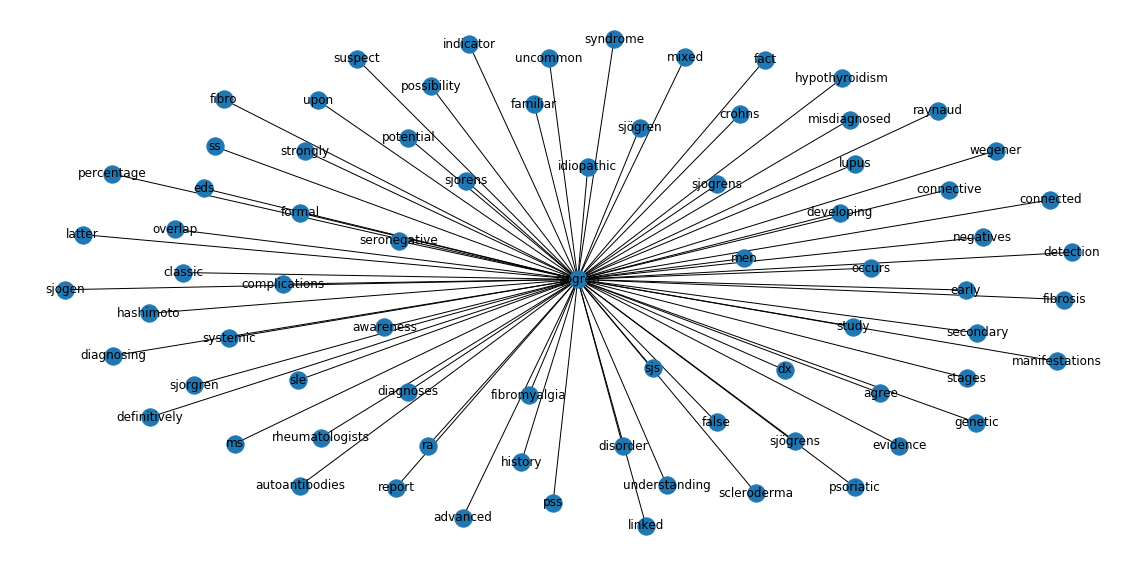

In [29]:
import networkx as nx
fig, ax = plt.subplots(figsize=(20,10))
g = nx.Graph()
for word1,dist in y:
    # cosine similarity makes more sense for edge weight
    g.add_edge(word1,"sjogren", weight=float(dist))

# Write the network
nx.draw(g, with_labels=True)
plt.show()


In [32]:
def dis(word):
    s=[('sjogren',1.0)]
    step1=[]
    w1 = word
    x=model.wv.most_similar(positive=w1,topn=10000)
    for i in x:
        d = list(i)
        s.append(d)
    for a,b in s:
        if b>0.75:
            step1.append(a)
    return step1

In [33]:
w=dis("sjogren")
w

['sjogren',
 'sjögren',
 'sjogrens',
 'ss',
 'sjögrens',
 'hashimoto',
 'developing',
 'secondary',
 'seronegative',
 'stages',
 'lupus',
 'formal',
 'sjorens',
 'pss',
 'overlap',
 'genetic',
 'idiopathic',
 'diagnosing',
 'men',
 'connective',
 'syndrome',
 'eds',
 'sle',
 'understanding',
 'potential',
 'classic',
 'crohns',
 'occurs',
 'report',
 'hypothyroidism',
 'ms',
 'scleroderma',
 'manifestations',
 'strongly',
 'fibrosis',
 'dx',
 'possibility',
 'mixed',
 'indicator',
 'early',
 'wegener',
 'upon',
 'detection',
 'agree',
 'fibromyalgia',
 'familiar',
 'latter',
 'systemic',
 'uncommon',
 'evidence',
 'diagnoses',
 'fibro',
 'rheumatologists',
 'sjorgren',
 'suspect',
 'negatives',
 'psoriatic',
 'connected',
 'complications',
 'fact',
 'raynaud',
 'linked',
 'false',
 'ra',
 'definitively',
 'disorder',
 'history',
 'percentage',
 'sjs',
 'study',
 'sjogen',
 'misdiagnosed',
 'awareness',
 'advanced',
 'autoantibodies']

In [34]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
X = model[w] # X is an array of word vectors, each vector containing 150 tokens
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
Y = tsne_model.fit_transform(X)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


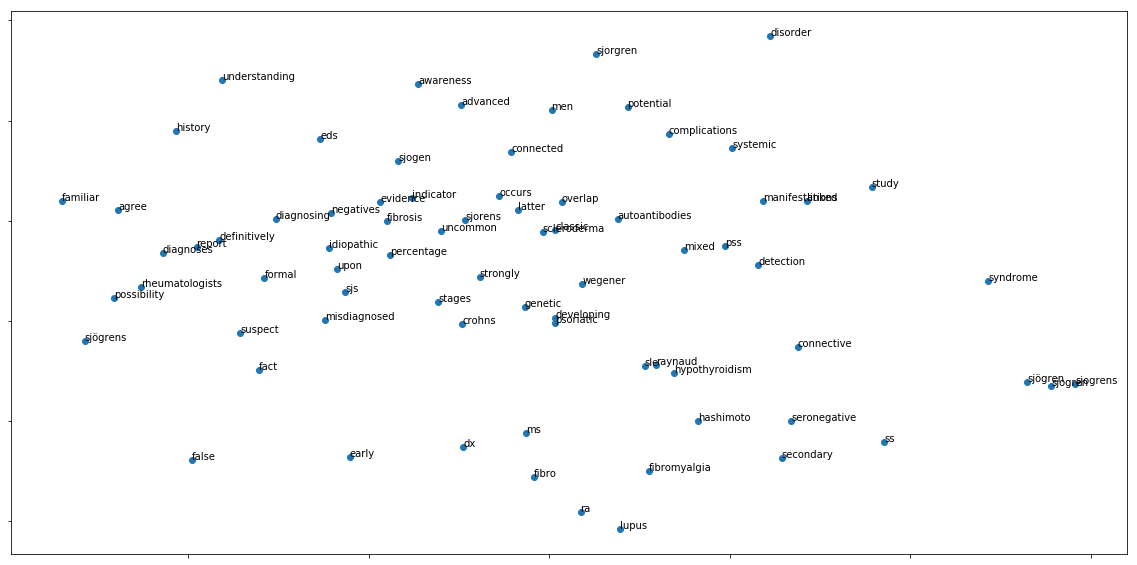

In [35]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(Y[:, 0], Y[:, 1])
words = w
for i, word in enumerate(words):
    plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks
_ = plt.show()

# Search Function:

In [18]:
def search(word):
    s=[]
    step1=[]
    w1 = word
    x=model.wv.most_similar(positive=w1, topn=5)
    for i in x:
        print(i)
    for i in x:
        d = list(i)
        s.append(d)
    for a,b in s:
        step1.append(a)
    for u in step1:
        print('\n','for',u,model.wv.most_similar(positive= u , topn=5))

In [19]:
search("sjogren")

('sjögren', 0.9255070090293884)
('sjogrens', 0.8750261664390564)
('ss', 0.835112452507019)
('sjögrens', 0.8161634206771851)
('hashimoto', 0.8131330013275146)

 for sjögren [('sjogren', 0.9255070090293884), ('secondary', 0.8811395764350891), ('syndrome', 0.8631138801574707), ('ss', 0.8554239273071289), ('seronegative', 0.8495455384254456)]

 for sjogrens [('sjogren', 0.8750261068344116), ('sjögren', 0.7906512022018433), ('syndrome', 0.7758963108062744), ('developing', 0.7607830762863159), ('lupus', 0.7573451399803162)]

 for ss [('seronegative', 0.8855195045471191), ('sle', 0.883643627166748), ('early', 0.8588417768478394), ('antibodies', 0.8567119836807251), ('sjögren', 0.8554239273071289)]

 for sjögrens [('met', 0.9456394910812378), ('mayo', 0.9204535484313965), ('april', 0.9189755916595459), ('rheumatologists', 0.9140311479568481), ('received', 0.9113756418228149)]

 for hashimoto [('hypothyroidism', 0.9510273933410645), ('rheumatoid', 0.9311389923095703), ('sle', 0.9299107789993286

In [36]:
with open('reddit_list.txt', 'w') as f:
    for item in w:
        f.write("%s\n" % item)